<a href="https://colab.research.google.com/github/abrkha5/World-Cup-Analysis/blob/main/World_Predicative_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly as py
import cufflinks as cf

In [8]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [9]:
players = pd.read_csv("/WorldCupPlayers.csv")
matches = pd.read_csv("/WorldCupMatches.csv")
world_cup = pd.read_csv("/WorldCups.csv")

In [10]:
players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [11]:
players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [12]:
matches.tail()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
4567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
world_cup.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [15]:
matches.dropna(subset=['Year'], inplace=True)
matches.tail()
matches['Home Team Name'].value_counts()
names = matches[matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()
names

rn">Republic of Ireland       5
rn">United Arab Emirates      1
rn">Trinidad and Tobago       1
rn">Serbia and Montenegro     1
rn">Bosnia and Herzegovina    1
Name: Home Team Name, dtype: int64

In [16]:
wrong = list(names.index)
wrong

['rn">Republic of Ireland',
 'rn">United Arab Emirates',
 'rn">Trinidad and Tobago',
 'rn">Serbia and Montenegro',
 'rn">Bosnia and Herzegovina']

In [17]:
correct = [name.split('>')[1] for name in wrong]
correct

['Republic of Ireland',
 'United Arab Emirates',
 'Trinidad and Tobago',
 'Serbia and Montenegro',
 'Bosnia and Herzegovina']

In [18]:
old_name = ['Germany FR', 'Maracan� - Est�dio Jornalista M�rio Filho', 'Estadio do Maracana']
new_name = ['Germany', 'Maracan Stadium', 'Maracan Stadium']

In [19]:
wrong = wrong + old_name
correct = correct + new_name

In [20]:
wrong, correct

(['rn">Republic of Ireland',
  'rn">United Arab Emirates',
  'rn">Trinidad and Tobago',
  'rn">Serbia and Montenegro',
  'rn">Bosnia and Herzegovina',
  'Germany FR',
  'Maracan� - Est�dio Jornalista M�rio Filho',
  'Estadio do Maracana'],
 ['Republic of Ireland',
  'United Arab Emirates',
  'Trinidad and Tobago',
  'Serbia and Montenegro',
  'Bosnia and Herzegovina',
  'Germany',
  'Maracan Stadium',
  'Maracan Stadium'])

In [21]:
names = matches[matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()
names

rn">Republic of Ireland       5
rn">United Arab Emirates      1
rn">Trinidad and Tobago       1
rn">Serbia and Montenegro     1
rn">Bosnia and Herzegovina    1
Name: Home Team Name, dtype: int64

In [22]:
winner = world_cup['Winner'].value_counts()
winner

Brazil        5
Italy         4
Germany FR    3
Uruguay       2
Argentina     2
England       1
France        1
Spain         1
Germany       1
Name: Winner, dtype: int64

In [23]:
runnerup = world_cup['Runners-Up'].value_counts()
runnerup

Argentina         3
Germany FR        3
Netherlands       3
Czechoslovakia    2
Hungary           2
Brazil            2
Italy             2
Sweden            1
Germany           1
France            1
Name: Runners-Up, dtype: int64

In [24]:
third = world_cup['Third'].value_counts()
third

Germany        3
Brazil         2
Sweden         2
France         2
Poland         2
USA            1
Austria        1
Chile          1
Portugal       1
Germany FR     1
Italy          1
Croatia        1
Turkey         1
Netherlands    1
Name: Third, dtype: int64

In [25]:
teams = pd.concat([winner, runnerup, third], axis=1)
teams.fillna(0, inplace=True)
teams = teams.astype(int)
teams

,Winner,Runners-Up,Third
Brazil,5,2,2
Italy,4,2,1
Germany FR,3,3,1
Uruguay,2,0,0
Argentina,2,3,0
England,1,0,0
France,1,1,2
Spain,1,0,0
Germany,1,1,3
Netherlands,0,3,1


In [26]:
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [27]:
teams.iplot(kind = 'bar', xTitle='Teams', yTitle='Count', title='FIFA World Cup Winning Count')

In [28]:
matches.head(2)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL


In [29]:
home = matches[['Home Team Name', 'Home Team Goals']].dropna()
away = matches[['Away Team Name', 'Away Team Goals']].dropna()

In [30]:
home.columns = ['Countries', 'Goals']
away.columns = home.columns

In [31]:
goals = home.append(away, ignore_index = True)

In [32]:
goals = goals.groupby('Countries').sum()
goals
goals = goals.sort_values(by = 'Goals', ascending=False)
goals

,Goals
Countries,
Brazil,225.0
Argentina,133.0
Germany FR,131.0
Italy,128.0
France,108.0
...,...
Dutch East Indies,0.0
China PR,0.0
Canada,0.0


In [33]:
goals[:20].iplot(kind='bar', xTitle = 'Country Names', yTitle = 'Goals', title = 'Countries Hits Number of Goals')

Text(0.5, 1.0, 'Number of podium by country')

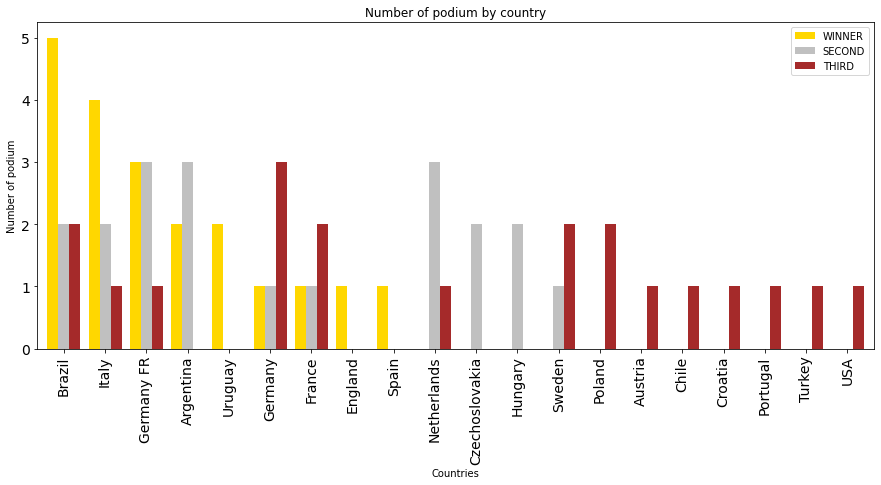

In [34]:
gold = world_cup["Winner"]
silver = world_cup["Runners-Up"]
bronze = world_cup["Third"]

gold_count = pd.DataFrame.from_dict(gold.value_counts())
silver_count = pd.DataFrame.from_dict(silver.value_counts())
bronze_count = pd.DataFrame.from_dict(bronze.value_counts())
podium_count = gold_count.join(silver_count, how='outer').join(bronze_count, how='outer')
podium_count = podium_count.fillna(0)
podium_count.columns = ['WINNER', 'SECOND', 'THIRD']
podium_count = podium_count.astype('int64')
podium_count = podium_count.sort_values(by=['WINNER', 'SECOND', 'THIRD'], ascending=False)

podium_count.plot(y=['WINNER', 'SECOND', 'THIRD'], kind="bar", 
                  color =['gold','silver','brown'], figsize=(15, 6), fontsize=14,
                 width=0.8, align='center')
plt.xlabel('Countries')
plt.ylabel('Number of podium')
plt.title('Number of podium by country')

Text(0.5, 1.0, 'Top 10 of Number of goals by country')

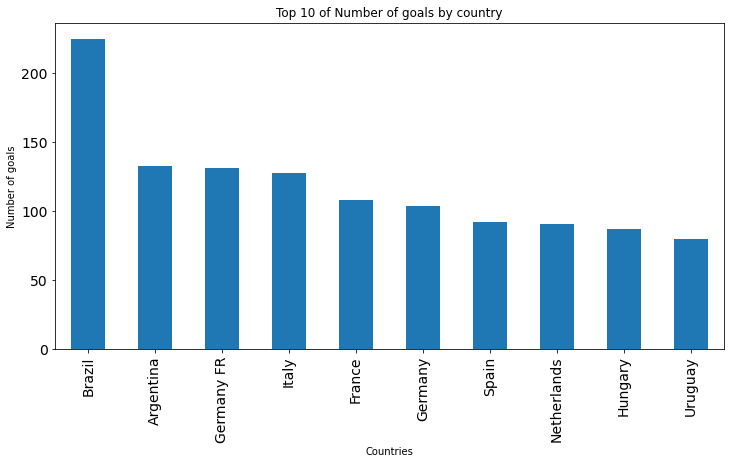

In [35]:
#world_cups_matches['Win conditions'].value_counts()
home = matches[['Home Team Name', 'Home Team Goals']].dropna()
away = matches[['Away Team Name', 'Away Team Goals']].dropna()

goal_per_country = pd.DataFrame(columns=['countries', 'goals'])
goal_per_country = goal_per_country.append(home.rename(index=str, columns={'Home Team Name': 'countries', 'Home Team Goals': 'goals'}))
goal_per_country = goal_per_country.append(away.rename(index=str, columns={'Away Team Name': 'countries', 'Away Team Goals': 'goals'}))

goal_per_country['goals'] = goal_per_country['goals'].astype('int64')

goal_per_country = goal_per_country.groupby(['countries'])['goals'].sum().sort_values(ascending=False)

goal_per_country[:10].plot(x=goal_per_country.index, y=goal_per_country.values, kind="bar", figsize=(12, 6), fontsize=14)
plt.xlabel('Countries')
plt.ylabel('Number of goals')
plt.title('Top 10 of Number of goals by country')